# N samples

In [1]:
import numpy as np
import tensorflow as tf

# Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]
N = X.shape[0]

# add 1
X = np.c_[np.ones((N, 1)), X]

# shuffle
inds = np.arange(N)
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X[:7])
print(y[:7])

[[1.  5.7 2.6 3.5 1. ]
 [1.  5.  3.  1.6 0.2]
 [1.  4.8 3.  1.4 0.1]
 [1.  5.  3.6 1.4 0.2]
 [1.  4.8 3.1 1.6 0.2]
 [1.  7.  3.2 4.7 1.4]
 [1.  6.2 2.8 4.8 1.8]]
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [2.]]


In [2]:
# theta
D = 4 + 1
K = 3
theta = tf.Variable(tf.zeros((D, K), dtype=tf.float64))
 
# forward
def compute_output(theta, X):
    return tf.math.softmax(X@theta)

In [3]:
# parameters
lr = 0.01
num_epochs = 1000
losses = [] # for debug

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [4]:
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = compute_output(theta, X)
        
        # loss
        loss = loss_fn(y, output)
        
    losses.append(loss.numpy())

    # gradient
    dtheta = t.gradient(loss, theta)

    # update
    theta.assign_sub(lr * dtheta)

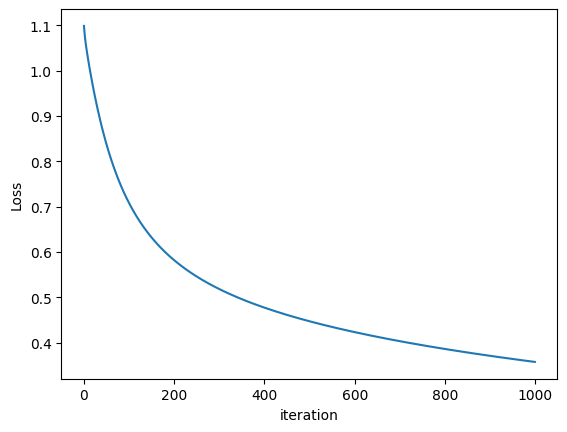

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [6]:
print(theta)

<tf.Variable 'Variable:0' shape=(5, 3) dtype=float64, numpy=
array([[ 0.16848743,  0.08467167, -0.2531591 ],
       [ 0.32202694,  0.17456566, -0.4965926 ],
       [ 0.8288372 , -0.27190856, -0.55692864],
       [-1.19809798,  0.18832046,  1.00977752],
       [-0.55255654, -0.17043636,  0.72299289]])>
